In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/BTC.csv")

In [3]:
df.head()

,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


In [4]:
print("Dataframe Shape: " , df.shape)
print("Dataframe feature Datatypes: ", df.dtypes)
print("Dataframe Description: ", df.describe())

Dataframe Shape:  (1974, 6)
Dataframe feature Datatypes:  Crypto     object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
dtype: object
Dataframe Description:                 Open          High           Low         Close
count   1974.000000   1974.000000   1974.000000   1974.000000
mean   20639.256839  21173.736069  20064.781662  20643.867275
std    16391.724861  16828.496642  15900.462608  16390.452205
min     3188.000000   3266.000000   3156.000000   3188.000000
25%     8010.000000   8213.750000   7748.000000   8007.750000
50%    11752.500000  12054.000000  11497.500000  11750.000000
75%    30955.250000  31873.750000  29689.000000  30983.250000
max    67802.000000  68925.000000  66112.000000  67802.000000


In [5]:
df.isnull().sum()

Crypto    0
Date      0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

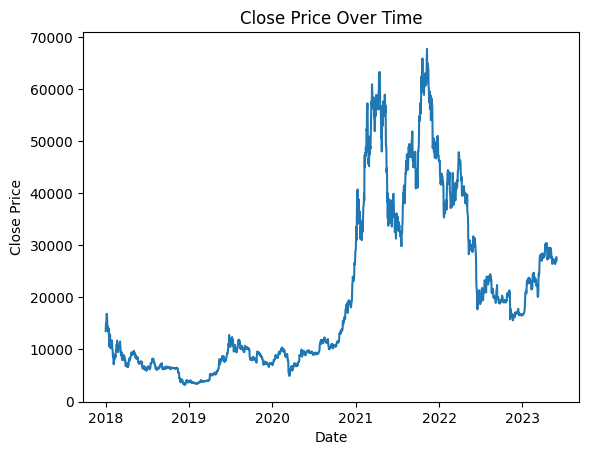

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


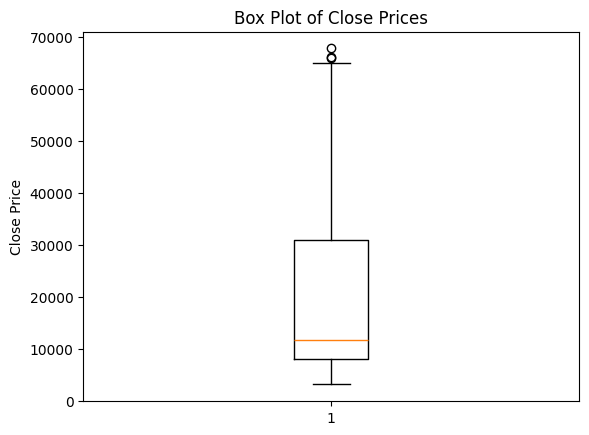

In [8]:
plt.figure()
plt.boxplot(df['Close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

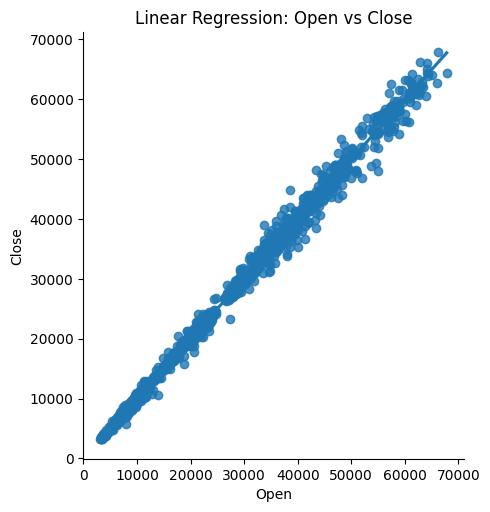

In [9]:
import seaborn as sns

sns.lmplot(x='Open', y='Close', data=df)
plt.title('Linear Regression: Open vs Close')
plt.show()

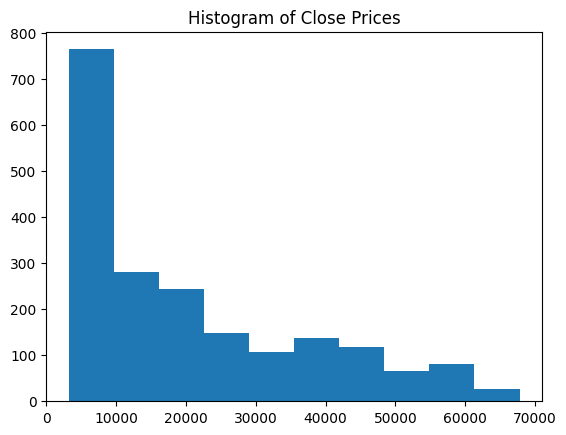

In [10]:
plt.figure()
plt.hist(df['Close'])
plt.title('Histogram of Close Prices')
plt.show()

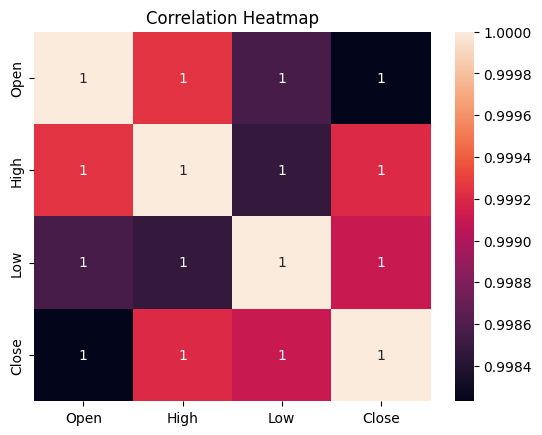

In [11]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df = df.sort_values('Date').reset_index(drop=True)

In [13]:
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


In [14]:
df['MA_7']  = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [15]:
df['Volatility_7']  = df['Daily_Return'].rolling(window=7).std()
df['Volatility_14'] = df['Daily_Return'].rolling(window=14).std()

In [16]:
window = 14
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [17]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = exp12 - exp26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
print(df.columns)
df.head()

Index(['Crypto', 'Date', 'Open', 'High', 'Low', 'Close', 'Daily_Return',
       'Log_Return', 'MA_7', 'MA_14', 'MA_30', 'Volatility_7', 'Volatility_14',
       'RSI', 'MACD', 'MACD_Signal'],
      dtype='object')


,Crypto,Date,Open,High,Low,Close,Daily_Return,Log_Return,MA_7,MA_14,MA_30,Volatility_7,Volatility_14,RSI,MACD,MACD_Signal
0,BTC,2018-01-30,11224.0,11224.0,9810.0,10138.0,-0.096676,-0.101675,11146.428571,11267.142857,12968.366667,0.051605,0.074081,47.403231,-764.685081,-713.589185
1,BTC,2018-01-31,10125.0,10334.0,9628.0,9999.0,-0.013711,-0.013806,10973.714286,11168.642857,12850.500000,0.049813,0.071116,41.983490,-817.575608,-734.386470
2,BTC,2018-02-01,9999.0,10203.0,8564.0,9146.0,-0.085309,-0.089168,10673.714286,10997.571429,12663.033333,0.055308,0.073771,37.111183,-917.742538,-771.057683
3,BTC,2018-02-02,9146.0,9164.0,7695.0,8524.0,-0.068008,-0.070431,10334.428571,10799.571429,12445.266667,0.057398,0.075172,35.664046,-1035.380531,-823.922253
4,BTC,2018-02-03,8588.0,9471.0,8176.0,9157.0,0.074261,0.071633,9992.000000,10531.928571,12253.133333,0.061343,0.065648,28.448177,-1065.252115,-872.188225


In [20]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    'Open','High','Low','Close',
    'Daily_Return','Log_Return',
    'MA_7','MA_14','MA_30',
    'Volatility_7','Volatility_14',
    'RSI','MACD','MACD_Signal'
]

In [21]:
scaler = MinMaxScaler(feature_range=(1, 10))

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


In [22]:
print(df_scaled[cols_to_scale].min())
print(df_scaled[cols_to_scale].max())


Open             1.0
High             1.0
Low              1.0
Close            1.0
Daily_Return     1.0
Log_Return       1.0
MA_7             1.0
MA_14            1.0
MA_30            1.0
Volatility_7     1.0
Volatility_14    1.0
RSI              1.0
MACD             1.0
MACD_Signal      1.0
dtype: float64
Open             10.0
High             10.0
Low              10.0
Close            10.0
Daily_Return     10.0
Log_Return       10.0
MA_7             10.0
MA_14            10.0
MA_30            10.0
Volatility_7     10.0
Volatility_14    10.0
RSI              10.0
MACD             10.0
MACD_Signal      10.0
dtype: float64


In [23]:
df_scaled['Target'] = df_scaled['Close'].shift(-1)
df_scaled = df_scaled.dropna()

In [24]:
split = int(len(df_scaled) * 0.8)
train = df_scaled.iloc[:split]
test  = df_scaled.iloc[split:]

In [25]:
X_train = train.drop(['Target','Crypto','Date'], axis=1)
y_train = train['Target']
X_test  = test.drop(['Target','Crypto','Date'], axis=1)
y_test  = test['Target']

In [26]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)


In [28]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_preds = best_xgb.predict(X_test)

print("Best XGBoost Params:", xgb_grid.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
